In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
C4 = np.zeros(N)
C6 = np.zeros(N)
rho = np.zeros(N)
title = "Hola"
t = 0 # Thicknes; set as global, defined in mono_fill and multi_fill
h = 0 # delta of the grid. Same as above 

planck = 4.135667e-15/(2*np.pi) #eV*s

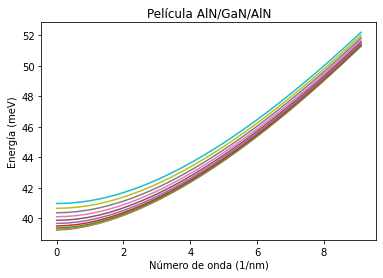

In [14]:
def mono_fill(): 
    global t, h, title
    title  = "Película sencilla de GaN"
    t = 6   #6 nm
    h = t/N
    for ii in range (N):
        C4[ii] = 91e3  #GaN and g/(nm*s)
        C6[ii] = 108e3 #GaN and g/(nm*s)
        rho[ii]= 6.1e-21  #GaN and g/nm^3
    

def multi_fill():
    global t, h, title
    title  = "Película AlN/GaN/AlN"
    t = 10   #6 nm
    h = t/N
    
    ## 0 -- 2 -- 8 -- 10
    ##  AlN - GaN - AlN 
    for ii in range (N):
        if (ii*h >= 2) and (ii*h < 8):
            C4[ii] = 91e3  #GaN and g/(nm*s)
            C6[ii] = 108e3 #GaN and g/(nm*s)
            rho[ii]= 6.1e-21  #GaN and g/nm^3  
        else:
            C4[ii] = 115e3  #AlN and g/(nm*s)
            C6[ii] = 126e3 #AlN and g/(nm*s)
            rho[ii]= 3.255e-21  #AlN and g/nm^3
               
            
def plot_density():
    X = np.zeros(N)
    for ii in range (N):
        X[ii] = ii*h
    plt.plot(X, rho)
    plt.ylim(0, 7e-21)
    plt.show()
            

def matrix_A():
    A = np.zeros((N,N))
    for ii in range (1,N-1):
        A[ii][ii-1] = (-C4[(ii+1)%N] + 4*C4[ii] + C4[ii-1])/(4*h*h)
        A[ii][ii] = -2*C4[ii]/(h*h) - C6[ii]*k*k
        A[ii][(ii+1)] = (C4[(ii+1)%N] + 4*C4[ii] - C4[ii-1])/(4*h*h)
    
    ## Boundary conditions
    #u_{-1} = u_{1}
    A[0][0] = -2*C4[0]/(h*h) - C6[0]*k*k
    A[0][1] = (2*C4[0])/(h*h)
    
    #u_{N+1} = u_{N-1}
    A[N-1][N-1] = -2*C4[N-1]/(h*h) - C6[N-1]*k*k
    A[N-1][N-2] = (2*C4[N-1])/(h*h)
    return -A


def matrix_B():
    B = np.zeros((N,N))
    for ii in range (N):
        B[ii][ii] = rho[ii]
    return B

def matrix_C(BB):
    C = np.zeros((N,N))
    for ii in range (N):
        C[ii][ii] = (BB[ii][ii])**(1/2)
    return C

def matrix_C1(CC):
    C1 = np.zeros((N,N))
    for ii in range (N):
        C1[ii][ii] = 1/CC[ii][ii]
    return C1

def add_plot():
    plt.plot(K, W*planck*1000)
    #plt.xlim(0,10)
    #plt.ylim(62,75)
    plt.xlabel(r"Número de onda (1/nm)")
    #plt.ylabel(r"Frecuencia $\omega$ (Hz)")
    plt.ylabel(r"Energía (meV)")
    
        

steps = 30
W = np.zeros (steps)
K = np.zeros (steps)

   
for ii in range (10):
    multi_fill()
    kx = ii*np.pi/t
    for jj in range (steps):
        kz =(jj)*np.pi/t 
        k = np.sqrt(kx**2 +kz**2) 

        A = matrix_A()
        B = matrix_B()
        C = matrix_C(B)
        C1 = matrix_C1(C)
        P = np.matmul(C1, A)
        P = np.matmul(P, C1)
        w2, v = np.linalg.eig (P)
        w = np.sqrt(w2)
        W[jj] = np.average(w)
        K[jj] = kz
    add_plot()

plt.title(title)
plt.show()

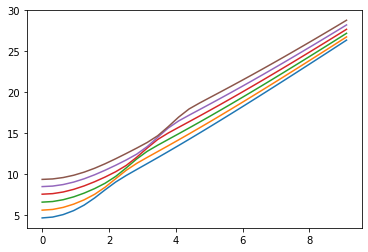

In [42]:
def mono_fill(): 
    global t, h
    t = 6   #6 nm
    h = t/N
    for ii in range (N):
        C4[ii] = 91e3  #GaN and g/(nm*s)
        C6[ii] = 108e3 #GaN and g/(nm*s)
        rho[ii]= 6.1e-21  #GaN and g/nm^3
    

def multi_fill():
    global t, h
    t = 10   #6 nm
    h = t/N
    
    ## 0 -- 2 -- 8 -- 10
    ##  AlN - GaN - AlN 
    for ii in range (N):
        if (ii*h >= 2) and (ii*h < 8):
            C4[ii] = 91e3  #GaN and g/(nm*s)
            C6[ii] = 108e3 #GaN and g/(nm*s)
            rho[ii]= 6.1e-21  #GaN and g/nm^3  
        else:
            C4[ii] = 115e3  #AlN and g/(nm*s)
            C6[ii] = 126e3 #AlN and g/(nm*s)
            rho[ii]= 3.255e-21  #AlN and g/nm^3
               
            
def plot_density():
    X = np.zeros(N)
    for ii in range (N):
        X[ii] = ii*h
    plt.plot(X, rho)
    plt.ylim(0, 7e-21)
    plt.show()
            

def matrix_A():
    A = np.zeros((N,N))
    for ii in range (1,N-1):
        A[ii][ii-1] = (-C4[(ii+1)%N] + 4*C4[ii] + C4[ii-1])/(4*h*h)
        A[ii][ii] = -2*C4[ii]/(h*h) - C6[ii]*k*k
        A[ii][(ii+1)] = (C4[(ii+1)%N] + 4*C4[ii] - C4[ii-1])/(4*h*h)
    
    ## Boundary conditions
    #u_{-1} = u_{1}
    A[0][0] = -2*C4[0]/(h*h) - C6[0]*k*k
    A[0][1] = (2*C4[0])/(h*h)
    
    #u_{N+1} = u_{N-1}
    A[N-1][N-1] = -2*C4[N-1]/(h*h) - C6[N-1]*k*k
    A[N-1][N-2] = (2*C4[N-1])/(h*h)
    return -A


def matrix_B():
    B = np.zeros((N,N))
    for ii in range (N):
        B[ii][ii] = rho[ii]
    return B

def matrix_C(BB):
    C = np.zeros((N,N))
    for ii in range (N):
        C[ii][ii] = (BB[ii][ii])**(1/2)
    return C

def matrix_C1(CC):
    C1 = np.zeros((N,N))
    for ii in range (N):
        C1[ii][ii] = 1/CC[ii][ii]
    return C1

def add_plot():
    plt.plot(K, W*planck*1000)
    #plt.xlim(0,10)
    #plt.ylim(62,75)
    plt.xlabel(r"Número de onda (1/nm)")
    #plt.ylabel(r"Frecuencia $\omega$ (Hz)")
    plt.ylabel(r"Energía (meV)")
    
        

steps = 30
curva_nivel = 6
WW = np.zeros ((curva_nivel, steps))
W = np.zeros(steps)
K = np.zeros (steps)

   
multi_fill()
for ii in range (steps):
    kz =(ii)*np.pi/t 
    k = kz 
    A = matrix_A()
    B = matrix_B()
    C = matrix_C(B)
    C1 = matrix_C1(C)
    P = np.matmul(C1, A)
    P = np.matmul(P, C1)
    w2, v = np.linalg.eig(P)
    W = np.sort(np.sqrt(w2))
    K[ii] = kz
    for jj in range (curva_nivel):
        WW[jj][ii] = W[jj+5] 
        
    
for ii in range (curva_nivel):
    plt.plot(K, WW[ii]*planck*1000)
    

plt.show()

In [39]:
K

array([ 0.        ,  0.52359878,  1.04719755,  1.57079633,  2.0943951 ,
        2.61799388,  3.14159265,  3.66519143,  4.1887902 ,  4.71238898,
        5.23598776,  5.75958653,  6.28318531,  6.80678408,  7.33038286,
        7.85398163,  8.37758041,  8.90117919,  9.42477796,  9.94837674,
       10.47197551, 10.99557429, 11.51917306, 12.04277184, 12.56637061,
       13.08996939, 13.61356817, 14.13716694, 14.66076572, 15.18436449])